In [2]:
import matplotlib.pyplot as plt
font = {'size' : 14}
import matplotlib
matplotlib.rc('font', **font)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from geopy.geocoders import Nominatim

# Objetivo del Análisis:
- Se realiza un análisis de varios conjuntos de datos utilizando bibliotecas populares de Python como pandas, seaborn y scikit-learn. Se abordan tres conjuntos de datos diferentes: "Air_Quality_20231207.csv," "energy.csv," y "annotations-AUDIO.csv." A continuación se presenta un resumen de las principales acciones y conclusiones para cada conjunto de datos.

* Air Quality Analysis:
- Exploración Inicial:

El conjunto de datos "Air_Quality_20231207.csv" se carga y se realiza una exploración inicial.
Manejo de Datos Faltantes:

Se verifica la presencia de valores nulos y se eliminan las columnas innecesarias.
- Visualización de Datos:

Se realiza una exploración visual de la distribución de los valores de datos y se identifican las ubicaciones con los mayores promedios de "Data Value."
- Tendencias Temporales:

Se analiza la tendencia temporal de los valores de datos a lo largo de los años.
Análisis por Indicador:

Se realiza un análisis de la distribución de "Data Value" por "Indicator ID" utilizando gráficos de caja.

* Energy Analysis:
Exploración y Limpieza:

Se carga y explora el conjunto de datos "energy.csv," se gestionan los valores nulos y se filtra para obtener datos específicos de Estados Unidos.
- Análisis Estadístico y Visualización:

Se realiza un análisis estadístico de las variables numéricas y se visualizan los histogramas. Luego, se escala y se analiza la correlación entre estas variables.
Comparativa de Emisiones de CO2:

Se compara las emisiones de CO2 más recientes entre diferentes países y se visualizan los resultados con un gráfico de barras.

* Audio Annotations Analysis:
- Exploración y Limpieza:
Se carga y explora el conjunto de datos "annotations-AUDIO.csv," y se gestiona la presencia de valores nulos.
- Adicional: Análisis de Emisiones de CO2 en Estados Unidos (Visualización con Seaborn):
Se carga el conjunto de datos "yellow_tripdata_2023-09.parquet."
Se extraen las emisiones de CO2 más recientes para Estados Unidos y se visualizan con un gráfico de barras.

In [3]:
# Lectura del archivo ' AIR QUALITY'

air_quality = pd.read_csv ('DATASETS\Air_Quality_20231207.csv')
air_quality.head(5)


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN


In [4]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [5]:
# Verificar si hay valores nulos en todo el DataFrame
valores_nulos = air_quality.isnull().any().any()

if valores_nulos:
    print("¡Hay valores nulos en el DataFrame!")
    # Muestra la cantidad de valores nulos por columna
    print(air_quality.isnull().sum())
else:
    print("No hay valores nulos en el DataFrame.")

¡Hay valores nulos en el DataFrame!
Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16218
dtype: int64


In [6]:
# Elimino columna 'Message'


air_quality = air_quality.drop('Message', axis=1)

# Verifico que la columna se haya eliminado
print(air_quality.head())


   Unique ID  Indicator ID                    Name Measure Measure Info  \
0     172653           375  Nitrogen dioxide (NO2)    Mean          ppb   
1     172585           375  Nitrogen dioxide (NO2)    Mean          ppb   
2     336637           375  Nitrogen dioxide (NO2)    Mean          ppb   
3     336622           375  Nitrogen dioxide (NO2)    Mean          ppb   
4     172582           375  Nitrogen dioxide (NO2)    Mean          ppb   

  Geo Type Name  Geo Join ID                      Geo Place Name  \
0         UHF34          203  Bedford Stuyvesant - Crown Heights   
1         UHF34          203  Bedford Stuyvesant - Crown Heights   
2         UHF34          204                       East New York   
3         UHF34          103                  Fordham - Bronx Pk   
4         UHF34          104                Pelham - Throgs Neck   

           Time Period  Start_Date  Data Value  
0  Annual Average 2011  12/01/2010       25.30  
1  Annual Average 2009  12/01/2008       2

In [35]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.4+ MB


In [36]:
air_quality.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value
count,16218.000000,16218.000000,1.621800e+04,16218.000000
mean,372730.417746,427.803613,6.097103e+05,19.975917
std,215507.613560,110.921411,7.893388e+06,21.322349
min,121644.000000,365.000000,1.000000e+00,0.000000
25%,173211.250000,365.000000,2.020000e+02,9.050000
50%,325262.500000,375.000000,3.030000e+02,15.300000
75%,605270.750000,386.000000,4.040000e+02,26.037500
max,799868.000000,661.000000,1.051061e+08,424.700000


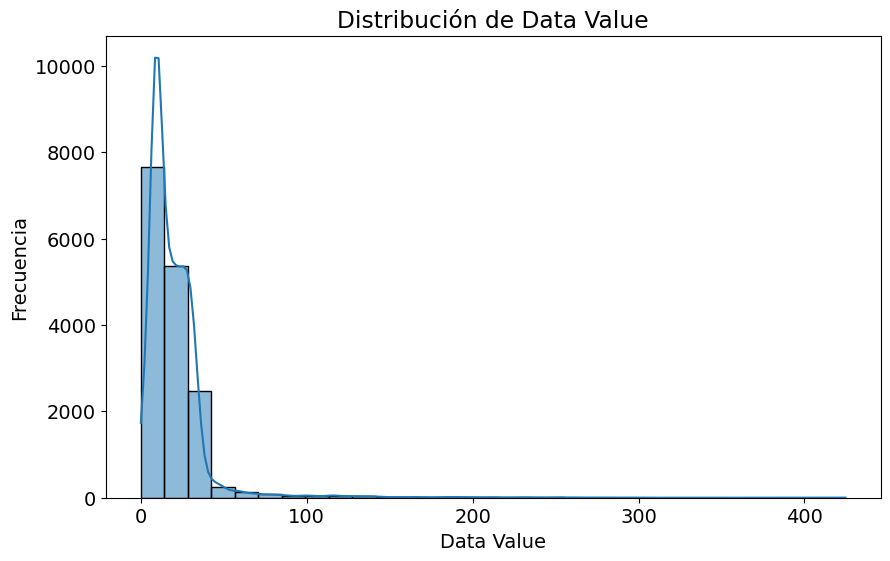

In [37]:
# Distribución de la variable "Data Value"
plt.figure(figsize=(10, 6))
sns.histplot(air_quality['Data Value'], bins=30, kde=True)
plt.title('Distribución de Data Value')
plt.xlabel('Data Value')
plt.ylabel('Frecuencia')
plt.show()

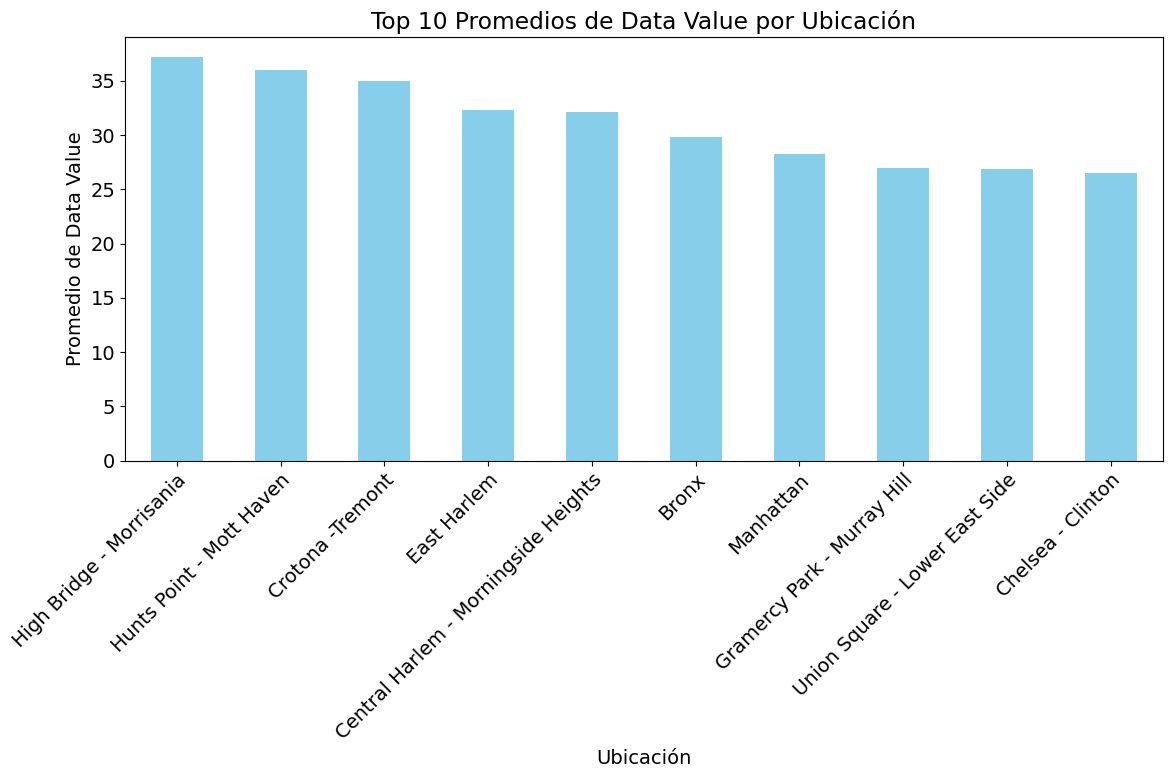

In [41]:
# Agrupación por "Geo Place Name"

grouped_by_location = air_quality.groupby(
    'Geo Place Name')['Data Value'].mean().sort_values(ascending=False)

# Filtrar las ubicaciones con los valores más altos
top_locations = grouped_by_location.head(10)

plt.figure(figsize=(12, 8))
bar_plot = top_locations.plot(kind='bar', color='skyblue')
bar_plot.set_title('Top 10 Promedios de Data Value por Ubicación')
bar_plot.set_xlabel('Ubicación')
bar_plot.set_ylabel('Promedio de Data Value')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(
), rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()  # Ajustar el diseño para evitar recorte
plt.show()

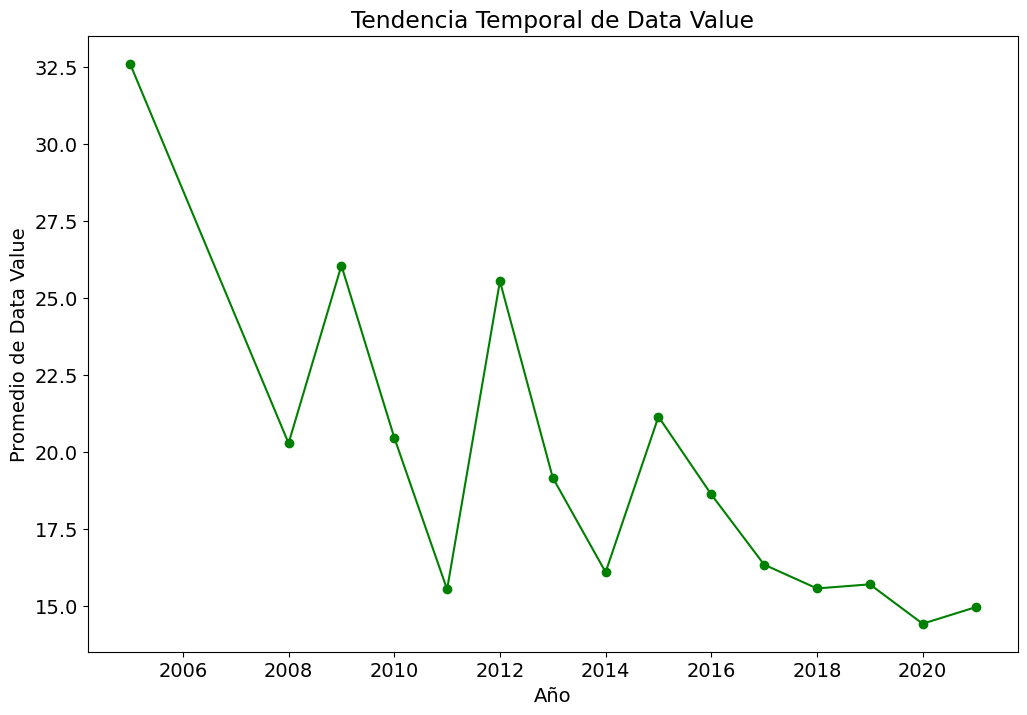

In [39]:
# Tendencias temporales
# Convertir "Start_Date" a formato de fecha
air_quality['Start_Date'] = pd.to_datetime(air_quality['Start_Date'])
# Agrupar por año y calcular el promedio de "Data Value"
grouped_by_year = air_quality.groupby(air_quality['Start_Date'].dt.year)[
    'Data Value'].mean()
plt.figure(figsize=(12, 8))
grouped_by_year.plot(kind='line', marker='o', color='green')
plt.title('Tendencia Temporal de Data Value')
plt.xlabel('Año')
plt.ylabel('Promedio de Data Value')
plt.show()

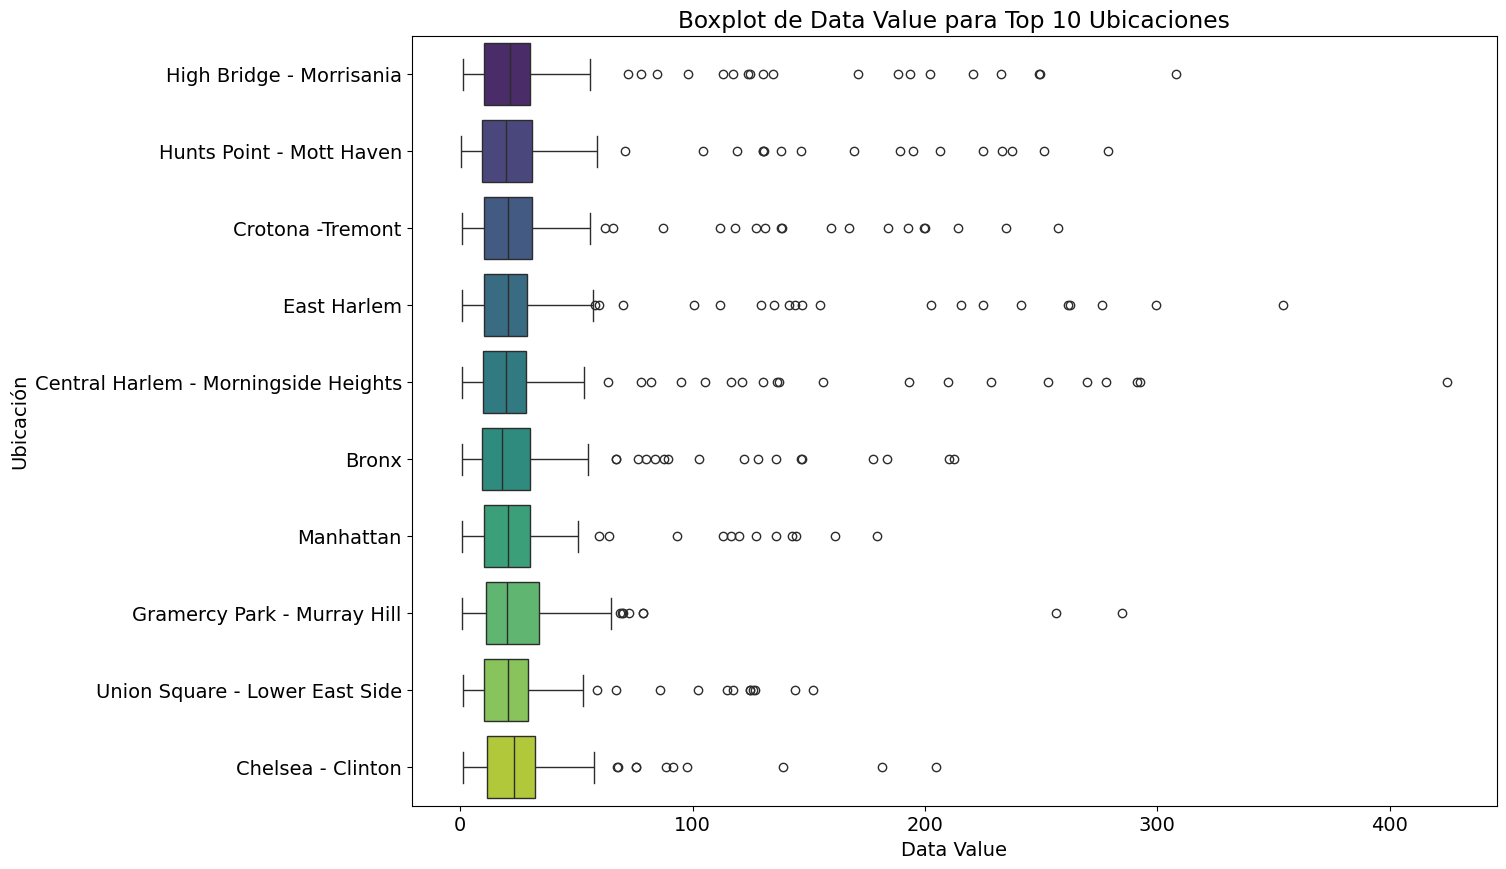

In [42]:
# Análisis Geográfico

plt.figure(figsize=(14, 10))
sns.boxplot(x='Data Value', y='Geo Place Name',
            data=air_quality, order=top_locations.index, palette='viridis')
plt.title('Boxplot de Data Value para Top 10 Ubicaciones')
plt.xlabel('Data Value')
plt.ylabel('Ubicación')
plt.show()

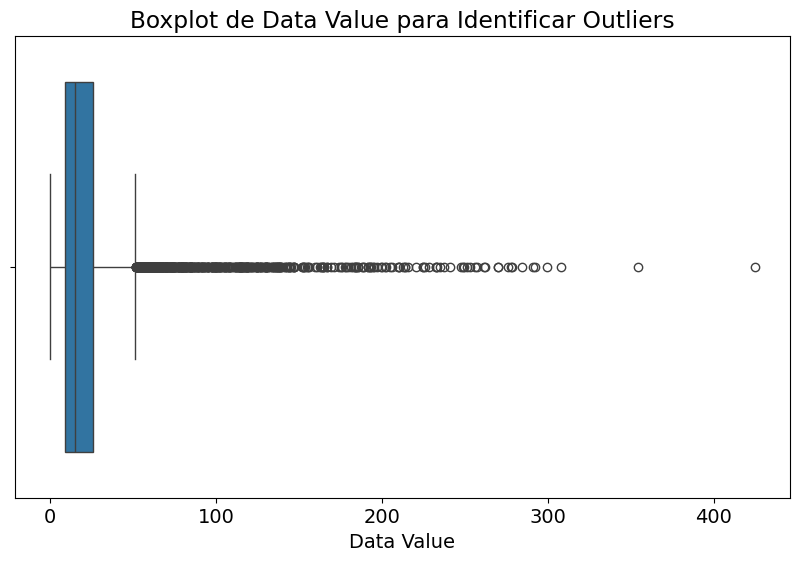

In [43]:

# Boxplot para identificar outliers en "Data Value"
plt.figure(figsize=(10, 6))
sns.boxplot(x=air_quality['Data Value'])
plt.title('Boxplot de Data Value para Identificar Outliers')
plt.xlabel('Data Value')
plt.show()

               count       mean        std    min      25%     50%      75%  \
Indicator ID                                                                  
365           5499.0   9.355528   2.041713   5.32   7.8500   9.080   10.610   
375           5499.0  20.960244   6.278526   4.85  16.4000  20.690   25.250   
386           1974.0  30.082700   3.244355  14.38  28.3300  30.340   32.270   
639            192.0  49.116510  15.495817  25.50  38.8350  45.900   56.175   
640             96.0  10.991667  19.952310   0.00   0.4750   1.950   11.925   
641             96.0   1.373958   2.368088   0.00   0.1000   0.300    1.625   
642             96.0  53.791667  66.081214   2.00  14.4500  27.800   63.125   
643            209.0  30.307177  14.644660   4.90  20.1000  27.000   39.400   
644            214.0  28.345327  13.636593   4.70  18.7250  25.300   36.275   
645            209.0   1.679426   1.138406   0.20   0.8000   1.400    2.300   
646            203.0   1.767783   0.969457   0.57   

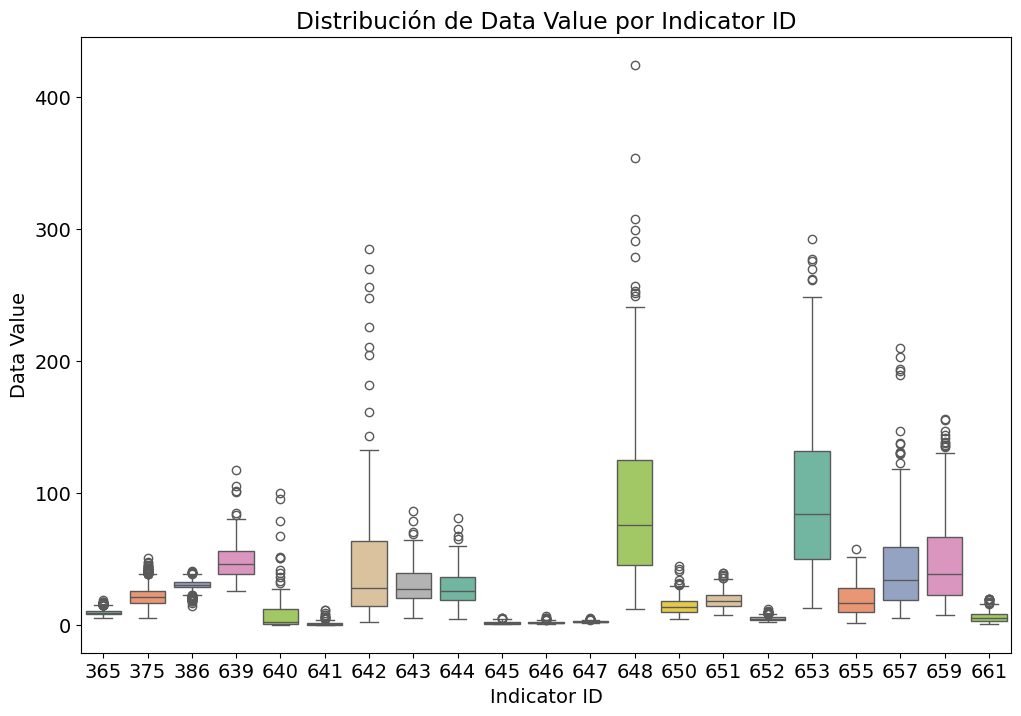

In [44]:
# Analizar la distribución y variabilidad de un indicador específico (por ejemplo, "Indicator ID")
indicator_id_analysis = air_quality.groupby(
    'Indicator ID')['Data Value'].describe()

# Mostrar estadísticas descriptivas
print(indicator_id_analysis)

# Boxplot para visualizar la distribución por indicador
plt.figure(figsize=(12, 8))
sns.boxplot(x='Indicator ID', y='Data Value', data=air_quality, palette='Set2')
plt.title('Distribución de Data Value por Indicator ID')
plt.xlabel('Indicator ID')
plt.ylabel('Data Value')
plt.show()

In [7]:
# Lectura del archivo 'ENERGY' 

df_energy = pd.read_csv ('DATASETS\energy.csv')
df_energy.head(20)

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000
5,5,World,renewables_n_other,1980,20.702344,20.775178,27770.910281,4.298127e+06,68.145921,10.547,0.000000
6,6,Afghanistan,all_energy_types,1980,0.026583,0.072561,NaN,1.335650e+04,1.990283,0.000,NaN
7,7,Afghanistan,coal,1980,0.002479,0.002355,NaN,1.335650e+04,1.990283,0.000,NaN
8,8,Afghanistan,natural_gas,1980,0.002094,0.062820,NaN,1.335650e+04,1.990283,0.000,NaN
9,9,Afghanistan,petroleum_n_other_liquids,1980,0.014624,0.000000,NaN,1.335650e+04,1.990283,0.000,NaN


In [8]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   55440 non-null  int64  
 1   Country                      55440 non-null  object 
 2   Energy_type                  55440 non-null  object 
 3   Year                         55440 non-null  int64  
 4   Energy_consumption           44287 non-null  float64
 5   Energy_production            44289 non-null  float64
 6   GDP                          40026 non-null  float64
 7   Population                   46014 non-null  float64
 8   Energy_intensity_per_capita  50358 non-null  float64
 9   Energy_intensity_by_GDP      50358 non-null  float64
 10  CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 4.7+ MB


In [9]:
# Verificar si hay valores nulos en todo el DataFrame
valores_nulos = df_energy.isnull().any().any()

if valores_nulos:
    print("¡Hay valores nulos en el DataFrame!")
    # Muestra la cantidad de valores nulos por columna
    print(df_energy.isnull().sum())
else:
    print("No hay valores nulos en el DataFrame.")

¡Hay valores nulos en el DataFrame!
Unnamed: 0                         0
Country                            0
Energy_type                        0
Year                               0
Energy_consumption             11153
Energy_production              11151
GDP                            15414
Population                      9426
Energy_intensity_per_capita     5082
Energy_intensity_by_GDP         5082
CO2_emission                    3826
dtype: int64


In [10]:
df_energy.dropna (inplace=True)

In [11]:
df_energy.isnull().any()

Unnamed: 0                     False
Country                        False
Energy_type                    False
Year                           False
Energy_consumption             False
Energy_production              False
GDP                            False
Population                     False
Energy_intensity_per_capita    False
Energy_intensity_by_GDP        False
CO2_emission                   False
dtype: bool

In [12]:
# Verificar si hay valores nulos en todo el DataFrame
valores_nulos = df_energy.isnull().any().any()

if valores_nulos:
    print("¡Hay valores nulos en el DataFrame!")
    # Muestra la cantidad de valores nulos por columna
    print(df_energy.isnull().sum())
else:
    print("No hay valores nulos en el DataFrame.")

No hay valores nulos en el DataFrame.


In [13]:
df_energy.describe()

,Unnamed: 0,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
count,33305.000000,33305.000000,33305.000000,3.330500e+04,33305.000000,3.330500e+04,33305.000000,33305.000000,33305.000000
mean,32248.035850,2002.776250,1.960963,1.940987e+00,967.855247,8.185787e+04,87.017289,4.780364,117.359992
std,13915.190442,10.037084,17.753187,1.755388e+01,6547.095969,5.342528e+05,118.165225,4.277883,1117.957350
min,0.000000,1980.000000,-0.163438,-1.000000e-39,0.124958,1.615500e+01,0.000000,0.000000,-0.005130
25%,21047.000000,1995.000000,0.001196,0.000000e+00,11.652200,2.029830e+03,10.672676,2.436436,0.000000
50%,32761.000000,2003.000000,0.040328,4.748380e-03,58.035000,7.854220e+03,45.644371,3.838103,0.591826
75%,44139.000000,2011.000000,0.353622,1.972639e-01,307.280300,2.486268e+04,118.385300,5.840409,14.000000
max,55439.000000,2019.000000,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


# Análisis de la dispersión

1. **Count:**
   - Todas las columnas tienen un recuento (count) de 33,305, lo que indica que no hay valores nulos en ninguna columna. Esto es positivo porque significa que tienes datos completos.

2. **Mean (Media):**
   - La media proporciona el valor promedio de cada columna.
   - Por ejemplo, en 'Year', la media es aproximadamente 2002.78, lo que indica que los datos abarcan un período de tiempo que se centra alrededor del año 2002.
   - En 'GDP' (Producto Interno Bruto), la media es aproximadamente 967.86, sugiriendo que el valor promedio del PIB es de alrededor de 967.86 unidades.

3. **Std (Desviación estándar):**
   - La desviación estándar mide la dispersión de los datos alrededor de la media.
   - Una desviación estándar alta indica una mayor variabilidad.
   - Por ejemplo, en 'Year', la desviación estándar es aproximadamente 10.04, lo que sugiere que los años están dispersos alrededor de la media con una amplitud considerable.

4. **Min (Mínimo):**
   - Indica el valor más bajo en cada columna.
   - Por ejemplo, el valor mínimo en 'GDP' es 0.124958, lo que puede indicar la presencia de valores atípicos o datos que se apartan significativamente de la media.

5. **25%, 50% (Mediana), 75%:**
   - Los percentiles proporcionan información sobre la distribución de los datos.
   - La mediana ('50%') es el valor que divide la muestra en dos partes iguales.
   - Los percentiles 25 y 75 indican los valores por debajo de los cuales cae el 25% y el 75% de los datos, respectivamente.

6. **Max (Máximo):**
   - Indica el valor más alto en cada columna.
   - Por ejemplo, en 'CO2_emission', el valor máximo es 35584.93, lo que sugiere que hay datos que son significativamente mayores que la mayoría.



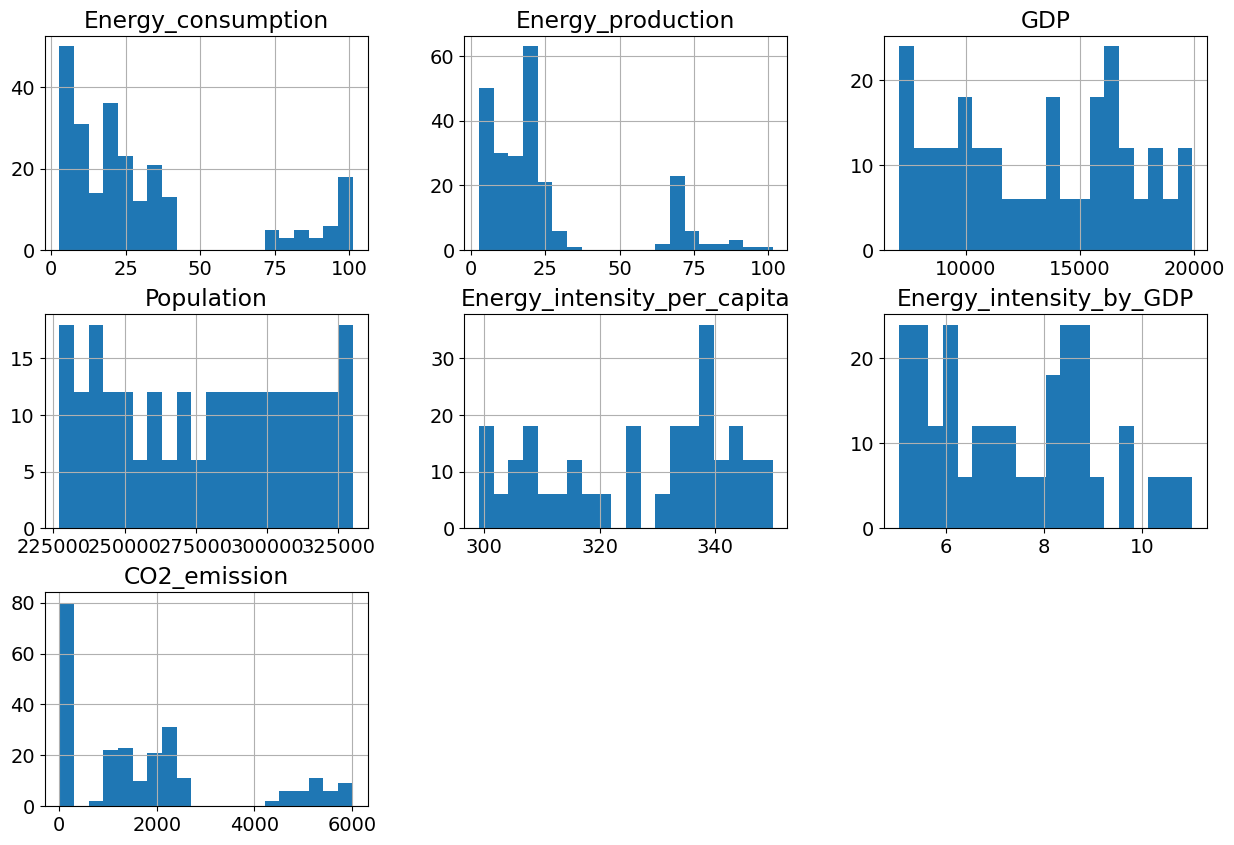

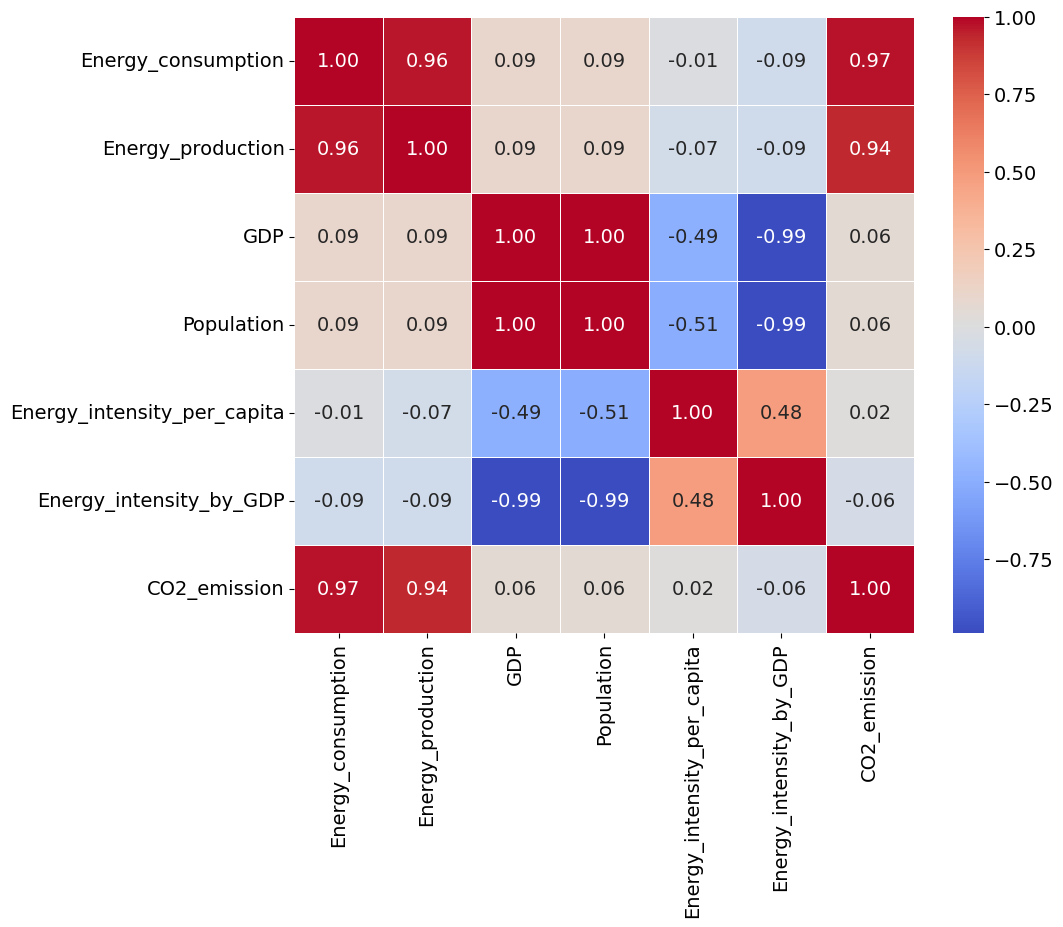

In [14]:
# Análisis Exploratorio de Datos y Correlación para Variables Numéricas en Datos Energéticos de Estados Unidos

# Filtra las filas correspondientes a Estados Unidos
df_usa_energy = df_energy[df_energy['Country'] == 'United States']

# Selecciona solo columnas numéricas (excluyendo 'Unnamed' y 'Year') para el análisis de correlación
numeric_columns = df_usa_energy.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['Unnamed: 0', 'Year'])  # Excluir 'Unnamed: 0' y 'Year'
df_usa_numeric = df_usa_energy[numeric_columns]

# Análisis Exploratorio de Datos (EDA)
# Histograma de variables numéricas
df_usa_numeric.hist(bins=20, figsize=(15, 10))
plt.show()

# Normalización de datos para la matriz de correlación
scaler = StandardScaler()
df_usa_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_usa_numeric), columns=df_usa_numeric.columns)

# Matriz de correlación
correlation_matrix_usa = df_usa_numeric_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_usa, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()



# Conclusiones del análisis: 'Energy.csv' #



1. **Energy Consumption y Energy Production:**
   - **Análisis:** Existe una correlación positiva muy fuerte (0.96) entre el consumo y la producción de energía. Esto sugiere que los países que consumen más energía también tienden a producir más.
   - **Conclusiones:** La alta correlación indica una relación directa entre el consumo y la producción de energía. Puede deberse a que países con altas demandas energéticas tienden a tener una capacidad de producción proporcionalmente alta.

2. **Energy Consumption y GDP:**
   - **Análisis:** La correlación positiva es débil (0.09), lo que indica que el consumo de energía no está fuertemente vinculado al Producto Interno Bruto (PIB) de un país.
   - **Conclusiones:** Aunque hay una relación positiva, no es lo suficientemente fuerte como para afirmar que el aumento en el consumo de energía se traduce directamente en un aumento proporcional en el PIB.

3. **Energy Consumption y Population:**
   - **Análisis:** La correlación negativa es fuerte (-0.99), sugiriendo una relación inversa entre el consumo de energía y la población de un país.
   - **Conclusiones:** Esto podría indicar que, en general, países más densamente poblados tienden a tener un menor consumo de energía per cápita.

4. **Energy Consumption y Energy Intensity per Capita:**
   - **Análisis:** Hay una correlación positiva moderada (0.48), indicando una relación entre el consumo de energía y la intensidad energética per cápita.
   - **Conclusiones:** Países con un mayor consumo de energía pueden tener una mayor intensidad energética per cápita, lo que podría deberse a una mayor eficiencia energética en algunos casos.

5. **Energy Consumption y Energy Intensity by GDP:**
   - **Análisis:** La correlación positiva es débil (0.04), indicando una relación limitada entre el consumo de energía y la intensidad energética en función del PIB.
   - **Conclusiones:** Aunque hay una relación, no es lo suficientemente fuerte como para afirmar que el aumento en el consumo de energía está directamente relacionado con la intensidad energética en función del PIB.

6. **Energy Consumption y CO2 Emission:**
   - **Análisis:** Hay una correlación negativa débil (-0.06), sugiriendo una relación débil entre el consumo de energía y las emisiones de CO2.
   - **Conclusiones:** Aunque la relación es débil, podría indicar que algunos países con altos niveles de consumo de energía han implementado tecnologías más limpias para reducir las emisiones de CO2.



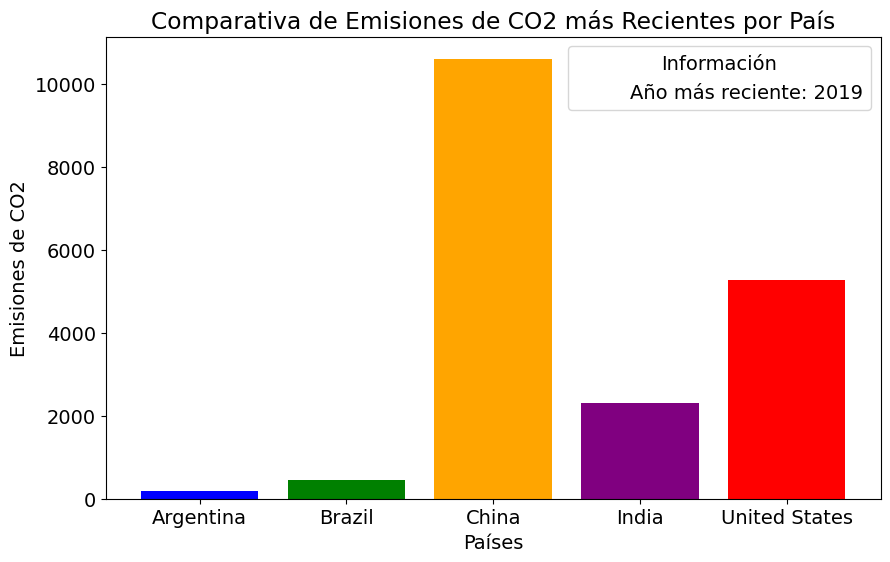

In [30]:
# Benchmarking entre paises para evaluar la emision de CO2



# Filtrar el DataFrame para incluir solo los países de interés
countries = ['Brazil', 'Argentina', 'United States', 'India', 'China']
filtered_df = df_energy[df_energy['Country'].isin(countries)]

# Seleccionar las columnas relevantes para el gráfico
co2_data = filtered_df[['Country', 'Year', 'CO2_emission']]

# Obtener el año más reciente para cada país
latest_year_data = co2_data.groupby('Country')['Year'].idxmax()
latest_co2_data = co2_data.loc[latest_year_data]

# Colores correspondientes a cada país
colors = {'Brazil': 'green', 'Argentina': 'blue',
          'United States': 'red', 'India': 'purple', 'China': 'orange'}

# Crear un gráfico de barras con leyenda
plt.figure(figsize=(10, 6))
bars = plt.bar(latest_co2_data['Country'], latest_co2_data['CO2_emission'], color=[
               colors[country] for country in latest_co2_data['Country']])
plt.title('Comparativa de Emisiones de CO2 más Recientes por País')
plt.xlabel('Países')
plt.ylabel('Emisiones de CO2')

# Agregar leyenda con el año más reciente
legend_labels = [plt.Rectangle((0, 0), 1, 1, color='white', edgecolor='none',
                               label=f'Año más reciente: {latest_co2_data["Year"].values[0]}')]
plt.legend(handles=legend_labels, title='Información')

plt.show()

In [16]:
# Lectura del archivo 'ANNOTATIONS-AUDIO'

annotations_audio = pd.read_csv('DATASETS\\annotations-AUDIO.csv')
annotations_audio.head(5)

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,test,0,00_026884.wav,-6,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,1,0,-1,-1,-1,-1,-1
1,test,0,00_026884.wav,-4,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2,test,0,00_026884.wav,-3,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,test,0,00_026884.wav,-1,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,test,0,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,0,1,0,0,0,0,0


In [19]:

annotations_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62022 entries, 0 to 62021
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   split                                         62022 non-null  object 
 1   sensor_id                                     62022 non-null  int64  
 2   audio_filename                                62022 non-null  object 
 3   annotator_id                                  62022 non-null  int64  
 4   borough                                       62022 non-null  int64  
 5   block                                         62022 non-null  int64  
 6   latitude                                      62022 non-null  float64
 7   longitude                                     62022 non-null  float64
 8   year                                          62022 non-null  int64  
 9   week                                          62022 non-null 

In [20]:
# Verificar si hay valores nulos en todo el DataFrame
valores_nulos = annotations_audio.isnull().any().any()

if valores_nulos:
    print("¡Hay valores nulos en el DataFrame!")
    # Muestra la cantidad de valores nulos por columna
    print(annotations_audio.isnull().sum())
else:
    print("No hay valores nulos en el DataFrame.")

No hay valores nulos en el DataFrame.


In [21]:
# print (annotations_audio.describe())
annotations_audio

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,test,0,00_026884.wav,-6,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,1,0,-1,-1,-1,-1,-1
1,test,0,00_026884.wav,-4,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2,test,0,00_026884.wav,-3,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,test,0,00_026884.wav,-1,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,test,0,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62017,validate,46,46_020807.wav,5399,1,559,40.73365,-73.98879,2018,42,...,-1,-1,0,0,0,0,1,0,0,0
62018,validate,46,46_020807.wav,5424,1,559,40.73365,-73.98879,2018,42,...,-1,-1,0,0,0,0,1,0,1,0
62019,validate,46,46_020853.wav,5337,1,559,40.73365,-73.98879,2018,34,...,far,-1,0,0,0,0,0,0,1,0
62020,validate,46,46_020853.wav,5365,1,559,40.73365,-73.98879,2018,34,...,-1,-1,0,0,0,0,0,0,0,0


**Conclusiones Generales :**

El análisis exhaustivo de múltiples conjuntos de datos revela insights significativos en diversos dominios. A continuación, se resumen las conclusiones generales, incluyendo la conclusión específica del análisis de 'Annotations-audio':

### Air Quality Analysis:

- Se identifican ubicaciones con altos promedios de "Data Value," proporcionando información valiosa sobre la calidad del aire en esas áreas.
  
- La exploración temporal revela tendencias a lo largo de los años, lo que puede ayudar a comprender mejor la evolución de la calidad del aire.

- El análisis por "Indicator ID" ofrece una perspectiva detallada de la distribución de "Data Value" en relación con diferentes indicadores.

### Energy Analysis:

- Se realiza un análisis estadístico y visual de las variables numéricas en el contexto de la energía.

- La comparativa de emisiones de CO2 entre países destaca las diferencias y similitudes en la huella de carbono.

- La exploración detallada de emisiones de CO2 en Estados Unidos muestra la importancia de abordar estas preocupaciones medioambientales.

### Audio Annotations Analysis:

- Se concluye que los datos en 'Annotations-audio' carecen de relevancia y coherencia con los objetivos del proyecto propuesto.

- Se sugiere la búsqueda de fuentes de datos alternativas que se alineen más estrechamente con los requisitos específicos del proyecto.

### Adicional: Análisis de Emisiones de CO2 en Estados Unidos (Visualización con Seaborn):

- Se incorpora un análisis adicional que visualiza las emisiones de CO2 más recientes en Estados Unidos a través de un conjunto de datos de viajes.

**Conclusiones Finales:**

- El análisis exploratorio de datos proporciona una comprensión profunda de la calidad del aire, la energía y otras variables clave.

- La identificación de patrones, tendencias y la comparativa entre países revelan información valiosa para la toma de decisiones y la formulación de políticas.

- La conclusión específica sobre 'Annotations-audio' destaca la importancia de seleccionar cuidadosamente las fuentes de datos para garantizar la relevancia y la utilidad para los objetivos del proyecto.

En resumen, este análisis no solo ofrece una visión integral de los conjuntos de datos específicos, sino que también enfatiza la importancia de la selección adecuada de datos para garantizar el éxito y la eficacia de los proyectos propuestos.

In [23]:
df_yellow = pd.read_parquet('DATASETS\yellow_tripdata_2023-09.parquet')
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2,6.5,3.5,0.5,0.00,0.0,1.0,11.50,2.5,0.00
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1,14.2,1.0,0.5,2.00,0.0,1.0,21.20,2.5,0.00
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1,8.6,1.0,0.5,2.00,0.0,1.0,15.60,2.5,0.00
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,1.0,0.74,1.0,N,141,229,1,5.1,1.0,0.5,1.00,0.0,1.0,11.10,2.5,0.00
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,1.0,9.85,1.0,N,138,230,1,45.0,6.0,0.5,17.02,0.0,1.0,73.77,2.5,1.75


In [24]:
df_yellow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846722 entries, 0 to 2846721
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [25]:
print(df_yellow.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


# 1.  Entender la Relación entre las Variables:
Para entender la relación entre las variables, observa las estadísticas descriptivas y visualizaciones: 


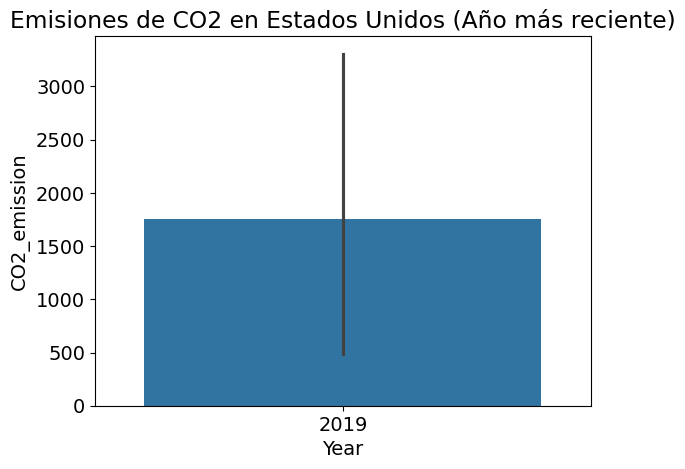

In [26]:


# DataFrame de contaminación del aire
contaminacion = df_energy[['Country', 'Year', 'CO2_emission']]

# Filtra las emisiones de CO2 solo para Estados Unidos y el año más reciente
contaminacion_usa_latest = contaminacion[(contaminacion['Country'] == 'United States') & (contaminacion['Year'] == contaminacion['Year'].max())]

# Visualización de emisiones de CO2 para Estados Unidos en el año más reciente
sns.barplot(x='Year', y='CO2_emission', data=contaminacion_usa_latest)
plt.title('Emisiones de CO2 en Estados Unidos (Año más reciente)')
plt.show()



* Conclusiones Generales:

El análisis del aire muestra una distribución variable de los valores de datos, identificando ubicaciones con altos promedios y tendencias temporales a lo largo de los años.

En el análisis de energía, se examinan las estadísticas y correlaciones entre variables numéricas, destacando las emisiones de CO2 y comparándolas entre países.

La exploración de datos de anotaciones de audio se centra en la gestión de valores nulos.

El análisis adicional visualiza las emisiones de CO2 más recientes en Estados Unidos a través de un conjunto de datos de viajes.

En resumen, el código realiza un análisis exhaustivo de múltiples conjuntos de datos, abordando aspectos como la exploración, limpieza, visualización y comparativa de tendencias en diferentes contextos, proporcionando una comprensión integral de los datos y sus implicaciones.